In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/YOLO/WIDER_train.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
def xuLyXY(y_input):
  return [y_input[0],y_input[1],y_input[0]+y_input[2],y_input[1]+y_input[3]]

In [0]:
def reshape_y_data(y_input,pre_shape):
  x_begin=int(y_input[0]*416/pre_shape[1])
  y_begin=int(y_input[1]*416/pre_shape[0])
  x_end=int(y_input[2]*416/pre_shape[1])
  y_end=int(y_input[3]*416/pre_shape[0])
  return [x_begin,y_begin,x_end,y_end]

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
file=open("/content/drive/My Drive/YOLO/wider_face_train_bbx_gt.txt",'r')
lines=file.readlines()
x_data=[]
y_data_raw=[]
face_num=0
link=True
face_max=False
no_face=False
for i in range(len(lines)):
  if no_face:
    no_face=False
    link=True
    continue
  if face_num==0 and link:
    img=cv2.imread(("/tmp/WIDER_train/images/"+lines[i]).rstrip(),1)
    pre_shape=img.shape
    img=cv2.resize(img, (416,416))
    y=[]
    link=False
    continue
  elif face_num==0:
    face_num=int(lines[i])
    if face_num==0: no_face=True
    if face_num>4: face_max=True
    continue
  else:
    face_num=face_num-1
    
    if face_max: 
      if face_num==0: 
        link=True
        face_max=False
      continue
      
    y.append(reshape_y_data(xuLyXY([int(t) for t in lines[i].rstrip().split(" ")]),pre_shape))
    if face_num==0: 
      link=True
      face_max=False
      if len(x_data)==0:
        x_data=np.array([img])
      else: x_data=np.append(x_data,[img],axis=0)
      y_data_raw.append(y)
      if len(y_data_raw)%100==0: print("Complete loading "+str(len(y_data_raw))+" image!")
  if (len(y_data_raw)==10000): break

Complete loading 100 image!
Complete loading 200 image!
Complete loading 300 image!
Complete loading 400 image!
Complete loading 500 image!
Complete loading 600 image!
Complete loading 700 image!
Complete loading 800 image!
Complete loading 900 image!
Complete loading 1000 image!
Complete loading 1100 image!
Complete loading 1200 image!
Complete loading 1300 image!
Complete loading 1400 image!
Complete loading 1500 image!
Complete loading 1600 image!
Complete loading 1700 image!
Complete loading 1800 image!
Complete loading 1900 image!
Complete loading 2000 image!
Complete loading 2100 image!
Complete loading 2200 image!
Complete loading 2300 image!
Complete loading 2400 image!
Complete loading 2500 image!
Complete loading 2600 image!
Complete loading 2700 image!
Complete loading 2800 image!
Complete loading 2900 image!
Complete loading 3000 image!
Complete loading 3100 image!
Complete loading 3200 image!
Complete loading 3300 image!
Complete loading 3400 image!
Complete loading 3500 i

In [6]:
print(x_data.shape)

(7931, 416, 416, 3)


[[[182, 99, 231, 143]], [[146, 28, 253, 126]], [[49, 215, 53, 222], [99, 214, 104, 222]], [[119, 78, 304, 231]], [[216, 66, 305, 180]], [[178, 53, 253, 128]], [[110, 88, 223, 189]], [[161, 146, 247, 223], [243, 220, 262, 237], [350, 253, 359, 263]], [[141, 115, 174, 187], [195, 307, 217, 353], [333, 322, 354, 365], [293, 359, 316, 394]], [[92, 152, 109, 167], [226, 169, 251, 191], [319, 149, 335, 164]], [[36, 170, 41, 180], [45, 178, 50, 186], [108, 171, 114, 183], [117, 172, 121, 182]], [[84, 124, 218, 243]], [[392, 403, 400, 416], [338, 400, 348, 416], [303, 84, 319, 121]], [[317, 208, 342, 235]], [[134, 69, 220, 229], [220, 125, 294, 269]], [[141, 54, 211, 121]], [[37, 47, 80, 82], [182, 42, 234, 87]], [[179, 34, 242, 106]], [[138, 234, 185, 327]], [[147, 31, 218, 95], [258, 74, 302, 116]], [[103, 253, 164, 341]], [[85, 144, 115, 188], [395, 164, 412, 197]], [[103, 73, 134, 106], [303, 75, 341, 116], [318, 13, 329, 24], [369, 55, 383, 68]], [[160, 112, 182, 149]], [[180, 131, 186, 1

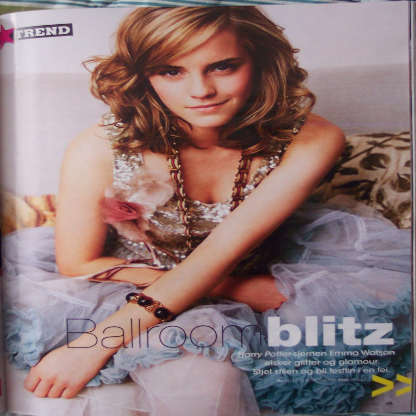

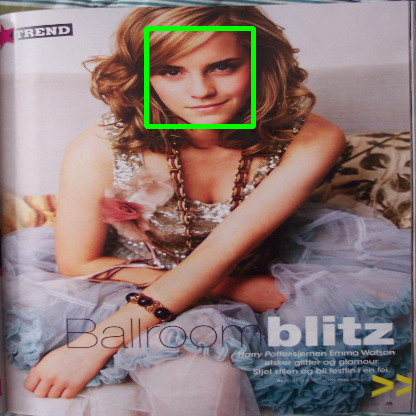

In [7]:
import copy
print(y_data_raw)
img_rect=copy.copy(x_data[1])
cv2.rectangle(img_rect,(y_data_raw[1][0][0],y_data_raw[1][0][1]),
                       (y_data_raw[1][0][2],y_data_raw[1][0][3]),(0,255,0),3)
cv2_imshow(x_data[1])
cv2_imshow(img_rect)

In [0]:
from math import floor
def get_y_data(y_raw):
  data=np.zeros((13,13,5,6),dtype=int)
  for face in y_raw:
    x_center=int((face[0]+face[2])/2)
    y_center=int((face[1]+face[3])/2)
    x_box=floor(x_center/(416/13))
    y_box=floor(y_center/(416/13))
    for i in range(5):
        data[y_box][x_box][i][0]=face[0]
        data[y_box][x_box][i][1]=face[1]
        data[y_box][x_box][i][2]=face[2]
        data[y_box][x_box][i][3]=face[3]
        data[y_box][x_box][i][4]=1
        data[y_box][x_box][i][5]=1
  return data

In [9]:
y_data=np.array([get_y_data(y_data_raw[0])], dtype=int)
for i, data in enumerate(y_data_raw):
  if i==0: continue
  y_data=np.append(y_data,[get_y_data(data)],axis=0)
print(y_data.shape)

(7931, 13, 13, 5, 6)


In [10]:
from keras.models import Sequential, Model, load_model
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import scipy.io
import os
import tensorflow as tf

def create_yolo_model():
    GRID_H, GRID_W = 13 , 13
    BOX = 5
    CLASS = 1

    model = Sequential()
    model.add(Conv2D(16, (3,3), strides=(1,1), padding='same', use_bias=False, input_shape=(416,416,3)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(0,4):
        model.add(Conv2D(32*(2**i), (3,3), strides=(1,1), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.1))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))

    model.add(Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))

    model.add(Conv2D(BOX * (4 + 1 + CLASS), (1, 1), strides=(1, 1), kernel_initializer='he_normal'))
    model.add(Activation('linear'))
    model.add(Reshape((GRID_H, GRID_W, BOX, 4 + 1 + CLASS)))
    return model

Using TensorFlow backend.


In [0]:
def custom_loss(y_true, y_pred):
    # CONSTANT 
    ANCHORS = '1.08,1.19,  3.42,4.41,  6.63,11.38,  9.42,5.11,  16.62,10.52'
    ANCHORS = [float(ANCHORS.strip()) for ANCHORS in ANCHORS.split(',')]
    ANCHORS = np.reshape(ANCHORS, [1,1,1,5,2])
    NORM_H, NORM_W = 416, 416
    GRID_H, GRID_W = 13 , 13
    SCALE_NOOB, SCALE_CONF, SCALE_COOR, SCALE_PROB = 0.5, 5.0, 5.0, 1.0
    BOX = 5
    CLASS = 1
   
    ### x and y predict    
    pred_box_xy = tf.sigmoid(y_pred[:,:,:,:,:2])
    
    ### w and h
    pred_box_wh = tf.exp(y_pred[:,:,:,:,2:4]) * np.reshape(ANCHORS, [1,1,1,BOX,2])
    pred_box_wh = tf.sqrt(pred_box_wh / np.reshape([float(GRID_W), float(GRID_H)], [1,1,1,1,2]))
    
    ###  confidence
    pred_box_conf = tf.expand_dims(tf.sigmoid(y_pred[:, :, :, :, 4]), -1)
    
    ### probability (face probability)
        # with multi object detect, use softmax
        # pred_box_prob = tf.nn.softmax(y_pred[:, :, :, :, 5:])
    pred_box_prob = tf.expand_dims(tf.sigmoid(y_pred[:, :, :, :, 5]), -1)

    y_pred = tf.concat([pred_box_xy, pred_box_wh, pred_box_conf, pred_box_prob], 4)
    print("Y_pred shape: {}".format(y_pred.shape))
    
    ### Adjust ground truth
    # adjust x and y true
    center_xy = .5*(y_true[:,:,:,:,0:2] + y_true[:,:,:,:,2:4])
    center_xy = center_xy / np.reshape([(float(NORM_W)/GRID_W), (float(NORM_H)/GRID_H)], [1,1,1,1,2])
    true_box_xy = center_xy - tf.floor(center_xy)
    
    # adjust w and h
    true_box_wh = (y_true[:,:,:,:,2:4] - y_true[:,:,:,:,0:2])
    true_box_wh = tf.sqrt(true_box_wh / np.reshape([float(NORM_W), float(NORM_H)], [1,1,1,1,2]))
    
    # adjust confidence
    pred_tem_wh = tf.pow(pred_box_wh, 2) * np.reshape([GRID_W, GRID_H], [1,1,1,1,2])
    pred_box_area = pred_tem_wh[:,:,:,:,0] * pred_tem_wh[:,:,:,:,1]
    pred_box_ul = pred_box_xy - 0.5 * pred_tem_wh
    pred_box_bd = pred_box_xy + 0.5 * pred_tem_wh
    
    true_tem_wh = tf.pow(true_box_wh, 2) * np.reshape([GRID_W, GRID_H], [1,1,1,1,2])
    true_box_area = true_tem_wh[:,:,:,:,0] * true_tem_wh[:,:,:,:,1]
    true_box_ul = true_box_xy - 0.5 * true_tem_wh
    true_box_bd = true_box_xy + 0.5 * true_tem_wh
    
    intersect_ul = tf.maximum(pred_box_ul, true_box_ul) 
    intersect_br = tf.minimum(pred_box_bd, true_box_bd)
    intersect_wh = intersect_br - intersect_ul
    intersect_wh = tf.maximum(intersect_wh, 0.0)
    intersect_area = intersect_wh[:,:,:,:,0] * intersect_wh[:,:,:,:,1]
    
    
    iou = tf.truediv(intersect_area, true_box_area + pred_box_area - intersect_area)
    print("iou shape: {}".format(iou.shape))
    reduce_max = tf.reduce_max(iou, [3], True)
    print("reduce_max shape: {}".format(reduce_max.shape))

    best_box = tf.equal(iou,reduce_max)
    best_box = tf.to_float(best_box)
    print("best_box shape{}".format(best_box.shape))
    
    true_box_conf = tf.expand_dims(best_box * y_true[:,:,:,:,4], -1)
    true_box_prob = y_true[:,:,:,:,5:]
    
    y_true = tf.concat([true_box_xy, true_box_wh, true_box_conf, true_box_prob], 4)
    print("Y_true shape: {}".format(y_true.shape))
    
    weight_coor = tf.concat(4 * [true_box_conf], 4)
    weight_coor = SCALE_COOR * weight_coor
    weight_conf = SCALE_NOOB * (1. - true_box_conf) + SCALE_CONF * true_box_conf
    weight_prob = tf.concat(CLASS * [true_box_conf], 4) 
    weight_prob = SCALE_PROB * weight_prob 
    weight = tf.concat([weight_coor, weight_conf, weight_prob], 4)
    print("Weight shape: {}".format(weight.shape))
    
    ### Finalize the loss
    loss = tf.pow(y_pred - y_true, 2)
    loss = loss * weight
    loss = tf.reshape(loss, [-1, GRID_W*GRID_H*BOX*(4 + 1 + CLASS)])
    loss = tf.reduce_sum(loss, 1)
    loss = .5 * tf.reduce_mean(loss)
    return loss

In [12]:
print(len(x_data))
x_train=x_data[:6500]
y_train=y_data[:6500]
x_test=x_data[6500:]
y_test=y_data[6500:]
print(len(x_test))

7931
1431


In [15]:
from keras.optimizers import Adam
from time import time
model = create_yolo_model()
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss = custom_loss, optimizer= adam, metrics=['mse'])
tensorboard=tf.keras.callbacks.TensorBoard(log_dir="/content/drive/My Drive/YOLO/logs/{}".format(time()))
model.fit(x_train,y_train,50,50,(x_test,y_test),callbacks=[tensorboard])

Y_pred shape: (?, 13, 13, 5, 6)
iou shape: (?, 13, 13, 5)
reduce_max shape: (?, 13, 13, 1)
best_box shape(?, 13, 13, 5)
Y_true shape: (?, 13, 13, 5, ?)
Weight shape: (?, 13, 13, 5, 6)
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


In [0]:
model.save('/content/drive/My Drive/YOLO/model.h5')